# Regressão polinomial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import linear_regression_models as lin
import common as com

data_table = pd.read_csv('data/ex1data1.txt', header=None)
x = data_table.drop(data_table.columns[-1], axis=1).values
y = data_table.iloc[:,data_table.columns[-1]].values

## Normalização dos dados

In [2]:
normalize_data = False

if normalize_data:
    x_original = x.copy()
    y_original = y.copy()
    
    x = com.normalize_data(x, ignore_first=False)['data']
    y = com.normalize_data(y, ignore_first=False)['data']

## Variáveis comuns

In [3]:
poly_order = 1

x_new = np.linspace(min(x), max(x), 100)[:,None]
x_new_matrix = lin.build_poly_regressors(x_new, poly_order=poly_order)

## Solução iterativa via gradiente descendente

In [4]:
model_gd = lin.gd(x=x, y=y, poly_order=poly_order, alpha=0.01, num_epochs=100*x.shape[0], build_regressors=True) 
w_gd = model_gd['w']    
mse_history_gd = model_gd['mse_history']
mse_gd = mse_history_gd[-1]

print("Parâmetros obtidos via GD")
print(w_gd) 
print("MSE após o treinamento")
print("%e" % mse_gd) 

Parâmetros obtidos via GD
[-3.89578078  1.19303363]
MSE após o treinamento
8.953943e+00


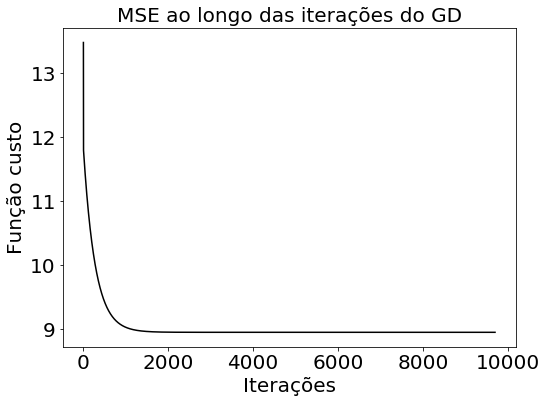

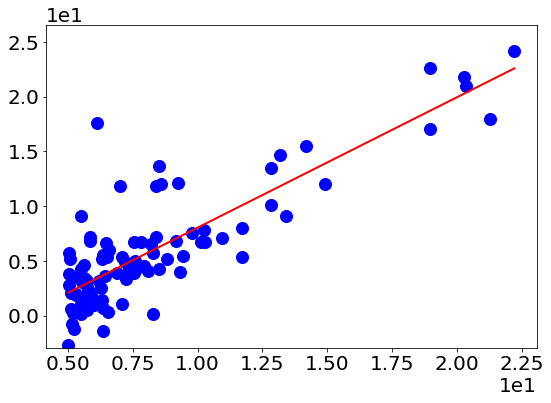

In [5]:
com.plot_loss_path(mse_history_gd, 'MSE ao longo das iterações do GD')
com.plot_regression_line(x=x, y=y, x_new=x_new_matrix, w=w_gd, save=False, file_name='linear_poly_reg_gd.png')

## Solução iterativa via gradiente descendente estocástico (LMS)

In [6]:
model_lms = lin.lms(x=x, y=y, poly_order=poly_order, alpha=10**-3, num_epochs=100, build_regressors=True) 
w_lms = model_lms['w']    
mse_history_lms = model_lms['mse_history']
mse_lms = mse_history_lms[-1]

print("Parâmetros obtidos via LMS")
print(w_lms) 
print("MSE após o treinamento")
print("%e" % mse_lms) 

Parâmetros obtidos via LMS
[-3.2376712   1.15028814]
MSE após o treinamento
9.076700e+00


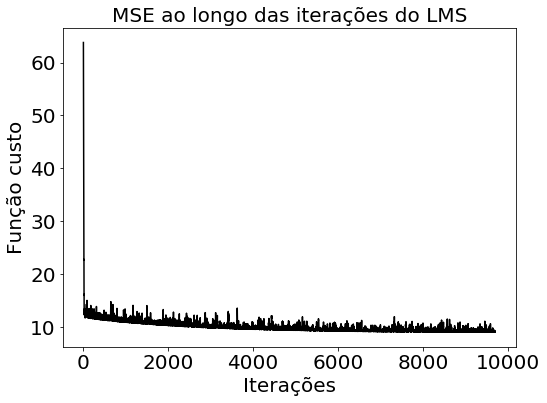

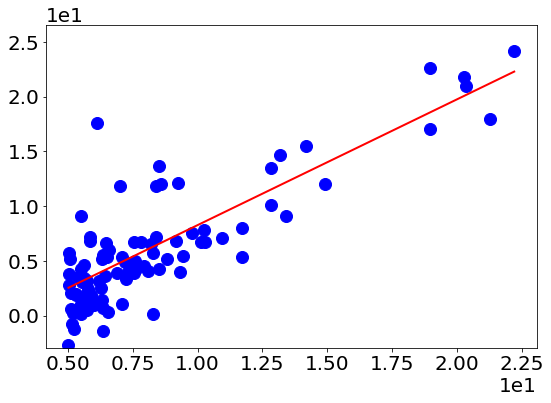

In [7]:
com.plot_loss_path(mse_history_lms, 'MSE ao longo das iterações do LMS')
com.plot_regression_line(x=x, y=y, x_new=x_new_matrix, w=w_lms, save=False, file_name='linear_poly_reg_lms.png')

## Solução em batch via OLS

Parâmetros obtidos via OLS
[-3.89578088  1.19303364]
MSE após o treinamento
8.953943e+00


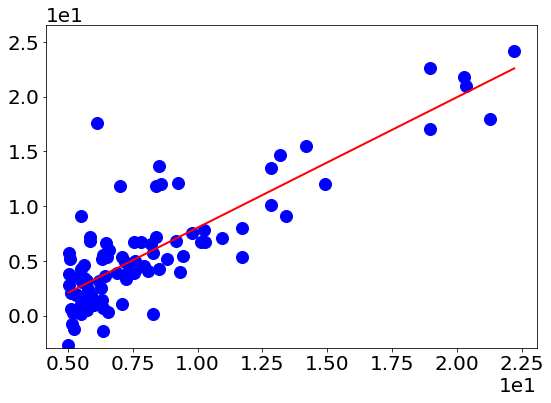

In [8]:
model_ols = lin.ols(x=x, y=y, poly_order=poly_order, build_regressors=True) 
w_ols = model_ols['w']
mse_ols = model_ols['mse']

print("Parâmetros obtidos via OLS")
print(w_ols)
print("MSE após o treinamento")
print("%e" % mse_ols) 

com.plot_regression_line(x=x, y=y, x_new=x_new_matrix, w=w_ols, save=False, file_name='linear_poly_reg_gd.png')

In [9]:
print("MSE obtido via GD: %.3e" % mse_gd)
print("Parâmetros obtidos via GD:\n%s\n" % w_gd)

print("MSE obtido via LMS: %.3e" % mse_lms)
print("Parâmetros obtidos via LMS:\n%s\n" % w_lms)

print("MSE obtido via OLS: %.3e" % mse_ols)
print("Parâmetros obtidos via OLS:\n%s\n" % w_ols)

MSE obtido via GD: 8.954e+00
Parâmetros obtidos via GD:
[-3.89578078  1.19303363]

MSE obtido via LMS: 9.077e+00
Parâmetros obtidos via LMS:
[-3.2376712   1.15028814]

MSE obtido via OLS: 8.954e+00
Parâmetros obtidos via OLS:
[-3.89578088  1.19303364]



## Variando a ordem do polinômio

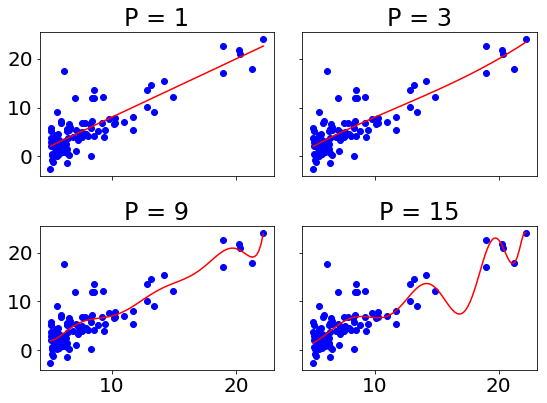

In [10]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=com.figsize)

orders = [1, 3, 9, 15]
for i, order in enumerate(orders):
    model_ols = lin.ols(x=x, y=y, poly_order=order, build_regressors=True) 
    w_ols = model_ols['w']
    plot_matrix = lin.build_poly_regressors(x_new, poly_order=order)
    axs.flatten()[i].plot(x, y, 'ob')
    axs.flatten()[i].plot(plot_matrix[:,1], plot_matrix @ w_ols, '-r')
    axs.flatten()[i].set_title("P = " + str(order))
#plt.savefig('var_order_poly_reg', dpi=com.dpi)